In [1]:
import sys
sys.path.append('/local/moreka/broadcast-ref')

In [2]:
from data.user import User
from data.db_connector import DbConnection

%load_ext line_profiler

In [3]:
conn = DbConnection()
user = User(2173621, conn, max_followee_per_follower=500)

db loaded on RAM


In [4]:
len(user.followers())

Dropped user 720573, because he had 1983 followers!
Dropped user 742973, because he had 2475 followers!
Dropped user 804204, because he had 49132 followers!
Dropped user 813286, because he had 779958 followers!
Dropped user 1092271, because he had 712 followers!
Dropped user 2209081, because he had 830 followers!
Dropped user 2559371, because he had 781 followers!
Dropped user 3126981, because he had 1275 followers!
Dropped user 3166481, because he had 510 followers!
Dropped user 4107251, because he had 6338 followers!
Dropped user 4782551, because he had 2002 followers!
Dropped user 5010251, because he had 948 followers!
Dropped user 6286052, because he had 1620 followers!
Dropped user 6717832, because he had 2022 followers!
Dropped user 9737352, because he had 2414 followers!
Dropped user 10036262, because he had 1281 followers!
Dropped user 11400722, because he had 648 followers!
Dropped user 12662472, because he had 8450 followers!
Dropped user 12925072, because he had 29740 follow

42

In [5]:
from opt.optimizer import learn_and_optimize

In [6]:
from opt import utils
best = learn_and_optimize(user, util=utils.weighted_top_one, util_gradient=utils.weighted_top_one_grad, threshold=1e-4)

fetching wall tweet list for 7467062
fetch done
fetching wall tweet list for 7786502
fetch done
fetching wall tweet list for 12920202
fetch done
fetching wall tweet list for 13506612
fetch done
fetching wall tweet list for 14145781
fetch done
fetching wall tweet list for 14405684
fetch done
fetching wall tweet list for 14560741
fetch done
fetching wall tweet list for 14599007
fetch done
fetching wall tweet list for 14619373
fetch done
fetching wall tweet list for 14685429
fetch done
fetching wall tweet list for 14722991
fetch done
fetching wall tweet list for 14743128
fetch done
fetching wall tweet list for 14747751
fetch done
fetching wall tweet list for 14938163
fetch done
fetching wall tweet list for 15009867
fetch done
fetching wall tweet list for 15063429
fetch done
fetching wall tweet list for 15196688
fetch done
fetching wall tweet list for 15345561
fetch done
fetching wall tweet list for 15610103
fetch done
fetching wall tweet list for 15864614
fetch done
fetching wall tweet li

upper bounds: 
[ 0.06864782  0.06419343  0.06221149  0.05947664  0.06562195  0.07373779
  0.08170623  0.08851884  0.0926987   0.09594493  0.11293323  0.11986025
  0.13246313  0.13168575  0.13363113  0.14777841  0.15643254  0.15999062
  0.17125779  0.149193    0.13373591  0.1034276   0.08346688  0.08535483]
budget: 
0.546875
bad users: 
2
iter 0
[ 0.02278642  0.02278642  0.02278641  0.02278641  0.02278642  0.02278643
  0.02278644  0.02278644  0.02278644  0.02278645  0.02278646  0.02278646
  0.02278648  0.02278648  0.02278648  0.0227865   0.02278651  0.02278652
  0.02278654  0.0227865   0.02278648  0.02278645  0.02278644  0.02278644]
iter 10
[  1.35681313e-02   1.22623390e-02   1.46809720e-02   2.06997174e-02
   3.33681103e-02   4.26802678e-02   5.27893813e-02   4.71524252e-02
   3.41811586e-02   4.54582491e-02   3.44479468e-02   2.68105902e-02
   1.10506557e-02   1.25997672e-02   1.41683578e-02   2.02500583e-02
   1.98253836e-02   2.05791191e-02   2.32779976e-02   2.38236766e-02
   1.73

Total time: 14257

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from simulator.simulate import *
from opt.utils import *
from data.models import *

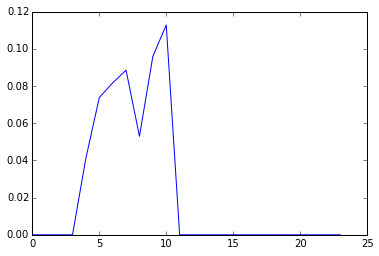

In [8]:
import numpy as np

plt.plot(best)
# plt.plot(user.tweet_list().get_periodic_intensity().sub_intensity(0, 24).get_as_vector()[0])

# for target in user.followers()[0:5]:
#     plt.plot(0.05 * np.array(target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24).get_as_vector()[0]))

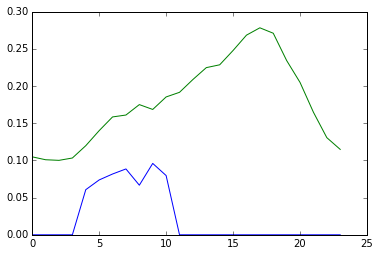

In [8]:
plt.plot(best)
# plt.plot(user.tweet_list().get_periodic_intensity().sub_intensity(0, 24).get_as_vector()[0])

average = np.zeros(24)
average_wall = np.zeros(24)
for target in user.followers():
    average += np.array(target.tweet_list().get_connection_probability()[0:24])
    average_wall += np.array(target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24).get_as_vector()[0])

# plt.plot(average / 42)
plt.plot(average_wall / 2000)

In [10]:
sum(best)

0.546875

User[7467062]
User[7786502]
User[12920202]
User[13506612]
User[14145781]
User[14405684]
User[14560741]
User[14599007]
User[14619373]
User[14685429]
User[14722991]
User[14743128]
User[14747751]
User[14938163]
User[15009867]
User[15063429]
User[15196688]
User[15345561]
User[15610103]
User[15864614]
User[15921665]
User[16302344]
User[16408019]
User[17060437]
User[17259259]
User[17677244]
User[20906745]
User[21416436]
User[24435362]
User[24782984]
User[28782591]
User[31394961]
User[34359300]
User[35121479]
User[38855762]
User[40874777]
User[45357486]
User[46469883]
User[46837072]
User[47196552]
User[48777750]
User[49308528]
[the] new gain is 0.003529 and the before using us was 0.002871
[sim] new gain is 0.003536 and the before using us was 0.002855


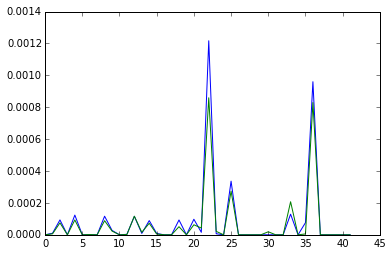

In [8]:
now, before = [], []
now_sim, before_sim = [], []

for target in user.followers():
    print target
    now += [user.get_follower_weight(target) * expected_f_top_one(Intensity(best),
                                                                 target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24),
                                                                 target.tweet_list().get_connection_probability()[0:24]) ]
    before += [user.get_follower_weight(target) * expected_f_top_one(user.tweet_list().get_periodic_intensity().sub_intensity(0, 24), 
                                                                  target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24),
                                                                  target.tweet_list().get_connection_probability()[0:24])]
    
    now_sim += [user.get_follower_weight(target) * get_expectation_std_top_k_simulating(Intensity(best),
                                                                                       target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24),
                                                                                       1,
                                                                                       target.tweet_list().get_connection_probability()[0:24])[0]]
    before_sim += [user.get_follower_weight(target) * get_expectation_std_top_k_simulating(user.tweet_list().get_periodic_intensity().sub_intensity(0, 24),
                                                                                          target.wall_tweet_list(user.user_id()).get_periodic_intensity().sub_intensity(0, 24),
                                                                                          1,
                                                                                          target.tweet_list().get_connection_probability()[0:24])[0]]

    
print '[the] new gain is %f and the before using us was %f' % (sum(now), sum(before))
print '[sim] new gain is %f and the before using us was %f' % (sum(now_sim), sum(before_sim))

plt.plot(now)
plt.plot(before)

In [11]:
for i in range(len(now)):
    print "%.2f %.2f" %(now[i],now_sim[i])
    print "%.2f %.2f" %(before[i], before_sim[i])

0.0 0.0
0.0 0.0
9.71973662831e-06 0.00101419313398
5.9478114676e-06 0.000476284048159
9.33369553006e-05 0.0114626880866
7.48481544689e-05 0.00617145737414
0.0 0.0
0.0 0.0
0.000123702588698 0.00545454140725
9.31344375351e-05 0.00307862188134
0.0 0.0
0.0 0.0
1.55608804895e-07 0.000581780538302
1.40726080364e-06 0.000309115273229
0.0 0.0
0.0 0.0
0.000116597271002 0.00832649015922
8.85078014099e-05 0.00457748862195
2.76744380237e-05 0.00443782727817
2.33175334828e-05 0.00272475284447
0.0 0.0
0.0 0.0
3.01188190721e-06 0.000463185720503
1.97012384939e-06 0.000266006775105
0.000116110637443 0.00628627153884
0.000116617548734 0.00367571354831
8.69750940394e-06 0.00224757104307
1.5513883659e-05 0.00143393287737
8.9046405647e-05 0.0159131793429
7.23098950037e-05 0.00964826511419
8.44587222527e-06 0.000253513152025
4.75035955698e-06 0.000158983040648
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
9.29088632572e-05 0.0150794429077
5.08832690275e-05 0.00760103809223
0.0 0.0
0.0 0.0
9.75692937398e-05 0.00544012759

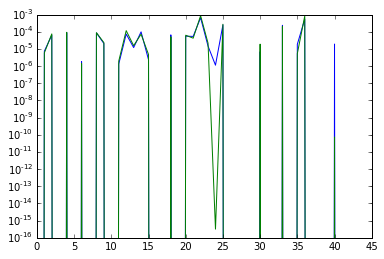

In [12]:
upper_bounds = np.zeros(oi.size())
followers_wall_intensities = []

for target in user.followers():
    target_wall_intensity = target.wall_tweet_list(excluded_user_id=user.user_id()).get_periodic_intensity(period_length, time_slots) \
        .sub_intensity(start_hour, end_hour)

    followers_wall_intensities.append(target_wall_intensity)

    _max = max([0] + [oi[i]['rate'] / (target_wall_intensity[i]['rate'] + oi[i]['rate'])
                for i in range(oi.size()) if target_wall_intensity[i]['rate'] != 0.0])

    if _max == 0:
        no_bad_users += 1

    upper_bounds += user.get_follower_weight(target) * (_max - 1.) * \
                    np.array(target_wall_intensity.get_as_vector()[0])

In [28]:
badman = user.followers()[29]

In [39]:
badman.wall_tweet_list(excluded_user_id=2173621).tweet_times

[1219811964,
 1219812218,
 1219813296,
 1219813430,
 1219813859,
 1219814102,
 1219842026,
 1219842133,
 1219845863,
 1219845899,
 1219847751,
 1219857464,
 1219861431,
 1219864424,
 1219888023,
 1219897621,
 1219920716,
 1219927318,
 1220139751,
 1220141678,
 1220142269,
 1220142408,
 1220142642,
 1220143097,
 1220143283,
 1220287529,
 1220287776,
 1220326418,
 1220359393,
 1220359638,
 1220368663,
 1220383452,
 1220385261,
 1220385634,
 1220385683,
 1220399916,
 1220411482,
 1220413110,
 1220444856,
 1220458028,
 1220458129,
 1220458253,
 1220458575,
 1220465706,
 1220468599,
 1220483028,
 1220505299,
 1220548656,
 1220548690,
 1220548806,
 1220549159,
 1220557332,
 1220562319,
 1220630709,
 1220633166,
 1220633619,
 1220633686,
 1220633900,
 1220634176,
 1220634330,
 1220638159,
 1220642772,
 1220648717,
 1220651300,
 1220662363,
 1220662472,
 1220721679,
 1220721907,
 1220721962,
 1220735459,
 1220738509,
 1220743379,
 1220743414,
 1220750927,
 1220751079,
 1220751385,
 1220763804,

(0, 5)

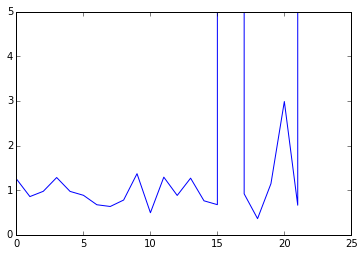

In [12]:
plt.plot([now[i]/before[i] for i in range(len(now)) if before[i] != 0])
plt.ylim([0, 5])

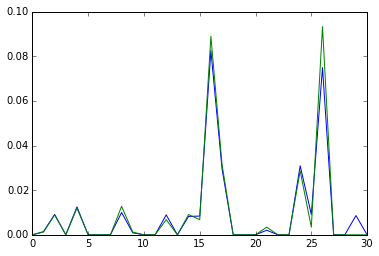

In [15]:
plt.plot(np.array(now_sim) * 42.)
plt.plot(np.array(before_sim) * 42.)